In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize

## YAG Power Scan as a function of QSwitch Delay
Measured with the Thorlabs ES245C energy head with ceramic coating.  
Litron Nano-LG 130-50 YAG Laser

Performed 128 measurements at each QSwitch delay

In [15]:
# qswitch delay in μs
qswitch_delay = [165, 170, 175, 180, 190, 200, 210, 160, 155, 150, 145, 140, 
                 135, 130, 120, 110, 100, 90, 125, 115, 112.5, 117.5]
# Vp of signal terminated into 1 MΩ (in mV)
Vp = [254.6, 240.9, 210.7, 202.1, 139.6, 94.25, 49, 297.3, 326.9, 348.4, 385.1, 406.6,
      425.7, 439.3, 462.0, 454.7, 413.7, 321.9, 454.8, 469.0, 445.7, 463.0]
σVp = [1, 1.8, 1, 1.4, 1.6, 1.7, 1, 1, 1.9, 1.2, 2.3, 2.1, 2.0, 1.5, 
       2.0, 1.9, 2.0, 2.0, 1.8, 2.3, 1.3, 1.8]

qswitch_delay = np.asarray(qswitch_delay)
Vp = np.asarray(Vp)
σVp = np.asarray(σVp)

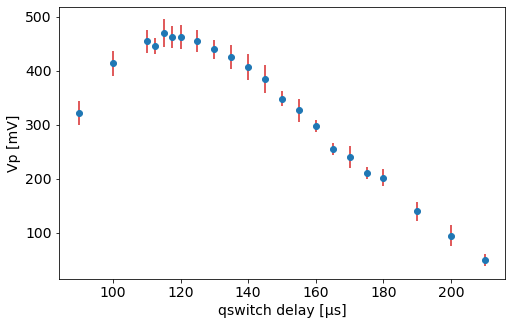

In [22]:
fig, ax = plt.subplots(figsize = (8,5))

ax.errorbar(qswitch_delay, Vp, yerr = σVp*np.sqrt(128), fmt = '.', ecolor = 'C3', ms = 12)
ax.set_xlabel('qswitch delay [μs]')
ax.set_ylabel('Vp [mV]')
set_fontsize(ax, 14)

Conversion from V to mJ is given by 8.31 V/J with 1 M$\Omega$ terminating impedance

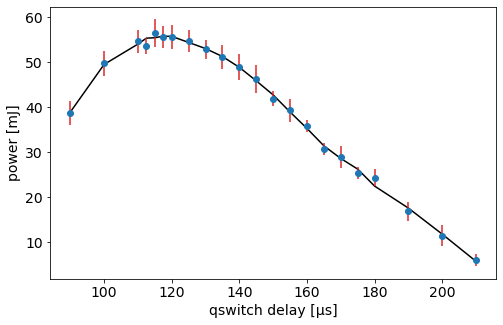

In [54]:
calibration = 8.31 # mV/mJ
fig, ax = plt.subplots(figsize = (8,5))

ax.errorbar(qswitch_delay, Vp/calibration, yerr = σVp*np.sqrt(128)/calibration, 
            fmt = '.', ecolor = 'C3', ms = 12)

ind_sorted = np.argsort(qswitch_delay)
ax.plot(qswitch_delay[ind_sorted], savgol_filter(Vp[ind_sorted]/calibration, 9,4), 
        color = 'k', zorder = 0)
ax.set_xlabel('qswitch delay [μs]')
ax.set_ylabel('power [mJ]')
set_fontsize(ax, 14)

Max power is a bit less than half of the specced power (130 mJ), however we are dumping most of the green with a filter. The half wave plate has been rotated to put most power into 1064 nm instead of 532 nm however, so need to check if without the filters the power is as specced.

Directly at the output of the YAG with a qswitch delay of 160 $\mu s$ the Vpp is 341.3(1) mV, and for 115 $\mu s$ the Vpp is 530.0(2.1) mV, corresponding to 41.1 mJ and 63.8 mJ, respectively. This means the maximum is still off by a factor 2, as specced by the manufacturer (130 mJ).  

Behind the filter, but in front of the beam expander 289.6(7.3) mV Vpp for 160 $\mu s$ was measured, corresponding to 34.8 mJ. Indeed most of the losses occur from the green filter, as expected. All optics are solely coated for 1064 nm, which is why we dump 532 nm.

In [3]:
289.6/8.31

34.84957882069796